##Problem Statement:
The data is of 50000 customer id with various features.The task is to predict if the customer will default or not

##Aim:
At the end we intend to make a model which gives a certain level of accuracy with optimum number of features

##Methodology

1.   First we made the data suitable for analysis
2.   Then we performed some basic EDA to know about some features of the data
3.   We tried to make a new feature using isolation forest algorithm so that it becomes easier to learn pattern from data
4.   We used weight of evidence and information value for variable selection
5.   Then a baseline logistic model was used to predict the probability of default.
6.   Then random forest and light gbm model were used to improve the performance
7.   In this project we have not used train test split instead of that we have taken a new dataset for testing  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#@title
data=pd.read_csv('/content/dcr_full.csv')

In [ ]:
#@title
data.head()

In [ ]:
#@title
l=list(data['id'])
l1=[]
for i in set(l):
  if l.count(i)>11:
    l1.append(i)

In [ ]:
#@title
 df=data[data['id'].isin(list(set(l1)))]
 df.shape

In [ ]:
#@title
def func(data1):
  data1.reset_index(inplace=True)
  d=data1[data1.index>len(data1['id'])-1-12]
  return d

In [ ]:
#@title
d=pd.DataFrame()
d1=pd.DataFrame()
for i in set(l1):
    d=func(data[data['id']==i])
    d1=pd.concat([d,d1],axis=0)

In [ ]:
#@title
d2=d1[d1['status_time']==2 ]

In [ ]:
#@title
d1.drop(['index','res_time','lgd_time','recovery_res'],inplace=True,axis=1)

In [ ]:
#@title
l=list(d2['id'])
finaldf=d1[~d1['id'].isin(l)]
final=pd.DataFrame()
final=finaldf

In [ ]:
#@title
def func1(d):
  d.reset_index(inplace=True)
  d1=d[d.index>len(d['id'])-2]
  return d1

In [ ]:
#@title
d5=pd.DataFrame()
d2=pd.DataFrame()
for i in set(list(final['id'])):
    d2=func1(final[final['id']==i])
    d5=pd.concat([d2,d3],axis=0)

In [275]:
d3=pd.read_csv('/content/creditcard.csv')

In [276]:
d3.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [277]:
org=d3.drop(['Time','V10','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V11','V12','V13','V14','V15','V16'],axis=1)

In [385]:
d4=org.iloc[0:100000,:]
test=org.iloc[100000:,:]

In [386]:
d4.columns=["FICO_time","interest_rate_time","uer_time","hpi_time","gdp_time","rate_time","LTV_time","LTV_orig_time","interest_rate_orig_time","balance_time",'class']
test.columns=["FICO_time","interest_rate_time","uer_time","hpi_time","gdp_time","rate_time","LTV_time","LTV_orig_time","interest_rate_orig_time","balance_time",'class']

##EDA

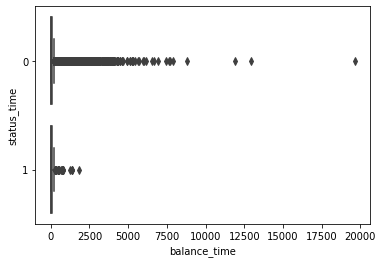

In [19]:
sns.boxplot(y='status_time',x="balance_time",data=d4,orient='h')

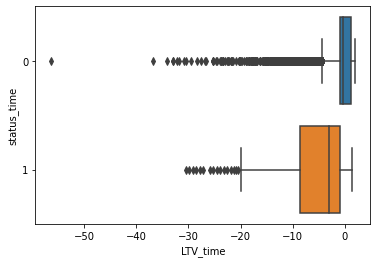

In [21]:
sns.boxplot(y='status_time',x="LTV_time",data=d4,orient='h')

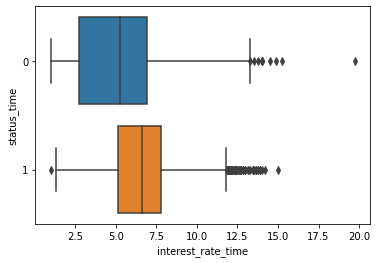

In [ ]:
sns.boxplot(y='status_time',x="interest_rate_time",data=d4,orient='h')

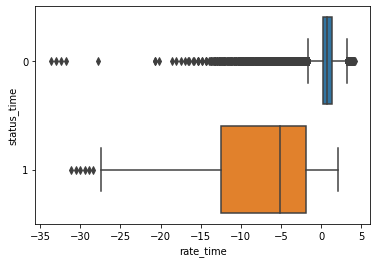

In [22]:
sns.boxplot(y='status_time',x="rate_time",data=d4,orient='h')

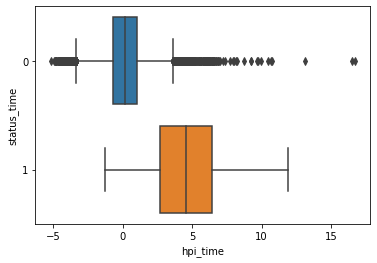

In [23]:
sns.boxplot(y='status_time',x="hpi_time",data=d4,orient='h')

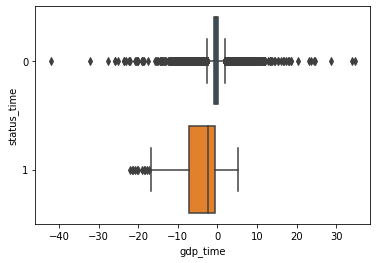

In [24]:
sns.boxplot(y='status_time',x="gdp_time",data=d4,orient='h')

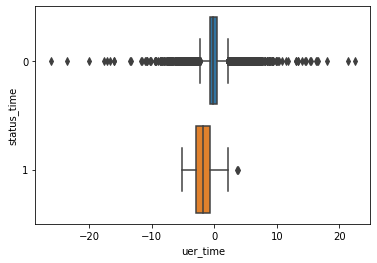

In [25]:
sns.boxplot(y='status_time',x="uer_time",data=d4,orient='h')

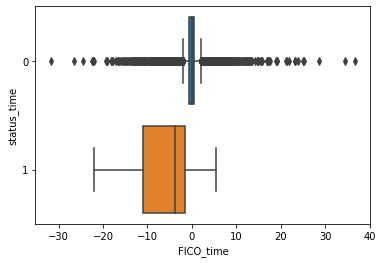

In [29]:
sns.boxplot(y='status_time',x="FICO_time",data=d4,orient='h')

###Observation:From the above boxplots we get an intuition that interest rate,hpi time,uer time can be significant variable because here the demarcations are stronger.This will help us in narrowing down are search while using information value.

In [389]:
X=d4.iloc[:,d4.columns!='class']
y=d4.iloc[:,d4.columns=='class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y)

In [392]:
X6=test.iloc[:,d4.columns!='class']
y6=test.iloc[:,d4.columns=='class']

###Vanilla Logistic regression model using all the original features

In [ ]:
m1=LogisticRegression(class_weight='balanced')
m1.fit(X_train,y_train)

In [391]:
y_pred=m1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     24944
           1       0.04      0.89      0.08        56

    accuracy                           0.96     25000
   macro avg       0.52      0.92      0.53     25000
weighted avg       1.00      0.96      0.98     25000



In [393]:
y_pred1=m1.predict(X6)
print(classification_report(y6,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96    184538
           1       0.02      0.91      0.03       269

    accuracy                           0.91    184807
   macro avg       0.51      0.91      0.49    184807
weighted avg       1.00      0.91      0.95    184807



###The results are certainly very good but can we perform using lesser but important number of features to make the practical use of this model more easy

####Here we use isolation forest for anamoly detection and assign them a score which will help machine in finding the patterns more easily 

In [396]:
vanilladf=d4.copy()

In [397]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.5),max_features=1.0)
model.fit(vanilladf[['uer_time']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.5,
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [398]:
vanilladf['score']=model.decision_function(vanilladf[['uer_time']])
#X_test1['score']=model.decision_function(X_test1[['uer_time']])

In [399]:
vanilladf.head()

,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,FICO_time,LTV_orig_time,interest_rate_orig_time,balance_time,class,score
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,149.62,0,-0.029987
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,2.69,0,0.008300
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,378.66,0,-0.166949
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,123.50,0,-0.108101
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,69.99,0,0.000898


###Weight of evidence and Information value for finding the suitable features

In [40]:
!pip install scorecardpy

     |████████████████████████████████| 55 kB 3.2 MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57842 sha256=d516cb0649d7ae3acc5d75e07630687a8ce379825925dbeaff804ca078a6803c
  Stored in directory: /root/.cache/pip/wheels/9d/50/52/715367c478fd2e2317070ccf6539b2c29fc8168144cfbfaeac
Successfully built scorecardpy


In [41]:
import scorecardpy as sc

In [400]:
bins1 = sc.woebin(d4, y="class")

[INFO] creating woe binning ...
Binning on 100000 rows and 11 columns in 00:00:10


In [401]:
l=X_train.columns

In [402]:
woedf=pd.DataFrame()
for i in l:
  dd=pd.DataFrame(bins[i])
  woedf=pd.concat([woedf,dd],axis=0)

In [403]:
woedf

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LTV_time,"[-inf,-2.0)",13100,0.091992,12972,128,0.009771,1.740838,0.746948,1.327506,-2.0,False
1,LTV_time,"[-2.0,1.0)",71184,0.499877,71094,90,0.001264,-0.312593,0.041967,1.327506,1.0,False
2,LTV_time,"[1.0,2.0)",42473,0.298259,42446,27,0.000636,-1.000795,0.188979,1.327506,2.0,False
3,LTV_time,"[2.0,inf)",15646,0.109871,15645,1,0.000064,-3.298551,0.349611,1.327506,inf,False
0,interest_rate_time,"[-inf,-1.0)",22635,0.158950,22622,13,0.000574,-1.102373,0.117169,1.846026,-1.0,False
1,interest_rate_time,"[-1.0,1.0)",93314,0.655281,93280,34,0.000364,-1.557645,0.806805,1.846026,1.0,False
2,interest_rate_time,"[1.0,inf)",26454,0.185769,26255,199,0.007522,1.477049,0.922052,1.846026,inf,False
0,rate_time,"[-inf,-2.0)",11290,0.079282,11102,188,0.016652,2.280917,1.565008,2.848158,-2.0,False
1,rate_time,"[-2.0,-1.0)",21660,0.152104,21636,24,0.001108,-0.444704,0.024297,2.848158,-1.0,False
2,rate_time,"[-1.0,0.0)",31003,0.217713,30983,20,0.000645,-0.986106,0.134750,2.848158,0.0,False


In [405]:
data_woe = sc.woebin_ply(d4, bins1)
#data_woe.drop(['id_woe'],inplace=True,axis=1)

[INFO] converting into woe values ...


In [406]:
data_woe.shape

(100000, 11)

In [407]:
data_woe.head()

,class,gdp_time_woe,rate_time_woe,uer_time_woe,hpi_time_woe,LTV_orig_time_woe,LTV_time_woe,balance_time_woe,FICO_time_woe,interest_rate_orig_time_woe,interest_rate_time_woe
0,0,-1.481460,-2.248723,-0.842669,-0.728972,-0.747996,-0.647788,-0.049465,-1.563489,-1.109684,-1.568991
1,0,-0.884611,-2.248723,-0.842669,-1.819036,-0.747996,-1.414081,0.773485,-1.563489,-1.109684,-1.568991
2,0,-1.481460,-2.248723,-1.891044,-1.819036,-0.747996,-0.647788,-0.049465,-1.563489,1.560987,-1.568991
3,0,-1.481460,-2.248723,-1.891044,-3.196271,-0.747996,-0.647788,-0.049465,-1.563489,1.560987,-1.568991
4,0,-1.481460,-2.248723,-0.842669,-1.819036,-0.747996,-0.647788,-1.315260,-1.563489,-1.109684,-1.568991


In [51]:
#@title
X1=data_woe.loc[:,data_woe.columns!='status_time']
Y1=data_woe.loc[:,data_woe.columns=='status_time']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, random_state=42,stratify=Y1)

In [ ]:
#@title
m2=LogisticRegression(max_iter=1000,class_weight='balanced')
m2.fit(X_train1,y_train1)

In [ ]:
#@title
y_pred1=m2.predict(X_test1)
print(classification_report(y_test1,y_pred1))

In [ ]:
#@title
X5=test_data_woe.iloc[:,2:18]
print(classification_report(y_final,m2.predict(X5)))

In [408]:
p={}
for i in l:
     p[i]=bins[i]['total_iv'][0]
p

{'FICO_time': 1.8836767400772505,
 'LTV_orig_time': 1.1092203781070897,
 'LTV_time': 1.3275060338378428,
 'balance_time': 0.4360337722211593,
 'gdp_time': 0.7595222174965585,
 'hpi_time': 3.6518368698863375,
 'interest_rate_orig_time': 1.4799324846656132,
 'interest_rate_time': 1.846026243231182,
 'rate_time': 2.8481584697925557,
 'uer_time': 1.05789642830767}

In [409]:
useful1=[]
for i in p:
  if(p[i]>=1.7):
    useful1.append(i)

In [410]:
useful1

['interest_rate_time', 'rate_time', 'hpi_time', 'FICO_time']

### 'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time' are the significant features

In [411]:
useful1.extend(['uer_time'])
useful1

['interest_rate_time', 'rate_time', 'hpi_time', 'FICO_time', 'uer_time']

In [444]:
comparedf=pd.DataFrame()
L=['LTV_time', 'interest_rate_time']
for i in useful1:
  if(i!='score') and i!='uer_time':
    comparedf[i+'_woe']=data_woe[i+'_woe']
comparedf['score']=model.decision_function(comparedf[['rate_time_woe']])
#comparedf['gdp_time']=vanilladf['gdp_time']
#comparedf['uer_time']=vanilladf['uer_time']
#comparedf['hpi_time']=vanilladf['hpi_time']
#comparedf['score']=vanilladf['score']
comparedf.dropna(axis=0,how='any')
comparedf['class']=d4['class']

###Out of sample data

In [ ]:
#test_data=org.iloc[100000:200000,:]
#test_data.c=["LTV_time","interest_rate_time","rate_time","hpi_time","gdp_time","uer_time","FICO_time","LTV_orig_time","interest_rate_orig_time","balance_time",'status_time']
test_woe = sc.woebin_ply(test, bins1)
test['score']=model.decision_function(test[['uer_time']])

In [448]:
L=['interest_rate_time', 'hpi_time', 'FICO_time', 'rate_time']
finaltestdf=pd.DataFrame()
for i in L:
  finaltestdf[i]=test_woe[i+"_woe"]
finaltestdf['score']=test['score']
L1=['class']
for i in L1:
  finaltestdf[i]=test[i]
#finaltestdf.dropna(axis=0,how='any')
finaltestdf.head()

,interest_rate_time,hpi_time,FICO_time,rate_time,score,class
100000,1.547191,-3.196271,-1.563489,-0.605783,-0.168759,0
100001,1.547191,-0.728972,1.915522,-0.605783,0.011793,0
100002,-1.568991,-0.728972,-1.563489,-0.605783,-0.234511,0
100003,-1.568991,-3.196271,-1.563489,-2.248723,0.016506,0
100004,-1.568991,-3.196271,-1.563489,-0.605783,0.008301,0


In [449]:
X_final=finaltestdf.loc[:,finaltestdf.columns!='class']
y_final=finaltestdf.loc[:,finaltestdf.columns=='class']

In [450]:
y_final.shape

(184807, 1)

In [451]:
X_final.head()

,interest_rate_time,hpi_time,FICO_time,rate_time,score
100000,1.547191,-3.196271,-1.563489,-0.605783,-0.168759
100001,1.547191,-0.728972,1.915522,-0.605783,0.011793
100002,-1.568991,-0.728972,-1.563489,-0.605783,-0.234511
100003,-1.568991,-3.196271,-1.563489,-2.248723,0.016506
100004,-1.568991,-3.196271,-1.563489,-0.605783,0.008301


In [452]:
y_final.sum()

class    269
dtype: int64

###Logistic regression model

In [453]:
X4=comparedf.loc[:,comparedf.columns != 'class']
y4=comparedf.loc[:,comparedf.columns=='class']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X4, y4, random_state=42,stratify=y4)

In [454]:
m3=LogisticRegression(class_weight='balanced')
m3.fit(X_train2,y_train2)
y_pred2=m3.predict(X_test2)
print(classification_report(y_test2,y_pred2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.94      0.97     24944
           1       0.03      0.95      0.07        56

    accuracy                           0.94     25000
   macro avg       0.52      0.94      0.52     25000
weighted avg       1.00      0.94      0.97     25000



In [455]:
print(classification_report(y_final,m3.predict(X_final)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    184538
           1       0.01      0.92      0.02       269

    accuracy                           0.88    184807
   macro avg       0.51      0.90      0.48    184807
weighted avg       1.00      0.88      0.94    184807



###Light GBM

In [456]:
from lightgbm import LGBMClassifier
model1 = LGBMClassifier(max_depth=1,class_weight='balanced',n_estimators=1000,learning_rate=0.01)
model1.fit(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split',
               learning_rate=0.01, max_depth=1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [457]:
y8=model1.predict(X_test2)
print(classification_report(y_test2,y8))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     24944
           1       0.03      0.95      0.06        56

    accuracy                           0.94     25000
   macro avg       0.52      0.94      0.52     25000
weighted avg       1.00      0.94      0.97     25000



###Here we see the performance has increased significantly hence we choose this model